In [24]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

In [25]:
data = pd.read_csv(r'D:\Documents\Teesside University\DA/CC GENERAL.csv')
data.head()
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [26]:
data.shape

(8950, 18)

In [27]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


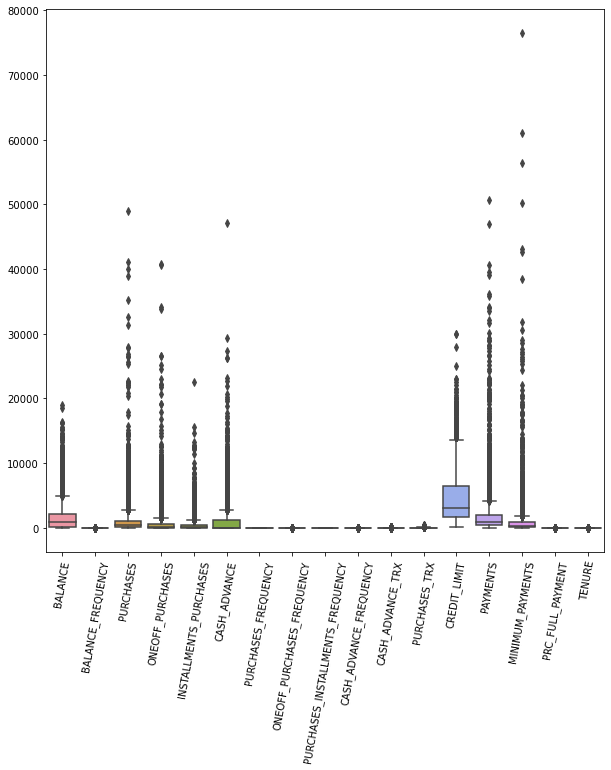

In [28]:
#Preprocessing
plt.figure(figsize=(10,10))
sns.boxplot(data=data)
plt.xticks(rotation=80)
plt.show()

In [29]:
#Dropping CUST_ID

data.drop(['CUST_ID'], axis=1, inplace=True)

In [30]:
data.shape

(8950, 17)

In [31]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [32]:
#MissingValue
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(),inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace=True) 

In [16]:
data.isnull().sum() 

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [17]:
#Outlier according to z-score
z = np.abs(stats.zscore(data))
z

array([[0.73198937, 0.24943448, 0.42489974, ..., 0.31096755, 0.52555097,
        0.36067954],
       [0.78696085, 0.13432467, 0.46955188, ..., 0.08931021, 0.2342269 ,
        0.36067954],
       [0.44713513, 0.51808382, 0.10766823, ..., 0.10166318, 0.52555097,
        0.36067954],
       ...,
       [0.7403981 , 0.18547673, 0.40196519, ..., 0.33546549, 0.32919999,
        4.12276757],
       [0.74517423, 0.18547673, 0.46955188, ..., 0.34690648, 0.32919999,
        4.12276757],
       [0.57257511, 0.88903307, 0.04214581, ..., 0.33294642, 0.52555097,
        4.12276757]])

In [18]:
np.where(z > 3)
data_1 = data[(z < 3).all(axis=1)]

In [19]:
data.shape

(8950, 17)

In [20]:
data_1.shape #Removed all outlier 

(7434, 17)

In [21]:
data_1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [22]:
#Normalizing
scale = StandardScaler()
X = scale.fit_transform(data_1)


In [23]:

names = data_1.columns
data_2 = pd.DataFrame(X, columns=names)
data_2.head() 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.809652,-0.334911,-0.641448,-0.543505,-0.448067,-0.543984,-0.805098,-0.668791,-0.698321,-0.690806,-0.587319,-0.665235,-1.021765,-0.762853,-0.577804,-0.531523,0.312187
1,1.273272,0.091127,-0.734487,-0.543505,-0.636612,4.671914,-1.225631,-0.668791,-0.910579,0.883825,0.427706,-0.797517,1.022039,1.953121,0.623747,0.232637,0.312187
2,0.807271,0.517164,0.019551,0.430864,-0.636612,-0.543984,1.297564,2.808268,-0.910579,-0.690806,-0.587319,-0.003826,1.192356,-0.470272,0.050485,-0.531523,0.312187
3,0.261448,-1.186986,0.727420,1.345575,-0.636612,-0.377388,-1.015366,-0.379037,-0.910579,-0.165931,-0.333563,-0.731376,1.192356,-0.903344,0.355657,-0.531523,0.312187
4,-0.297867,0.517164,-0.718883,-0.523341,-0.636612,-0.543984,-1.015366,-0.379037,-0.910579,-0.690806,-0.587319,-0.731376,-0.953638,-0.431099,-0.442194,-0.531523,0.312187


In [52]:
data_2.shape

(7434, 17)

In [11]:
#clustering

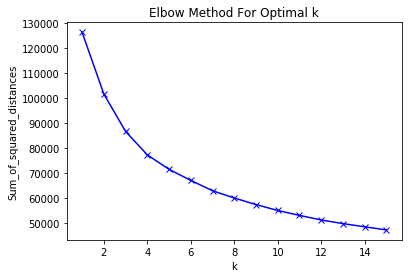

In [53]:
#elbow
Sum_of_squared_distances=[]
k= range(1,16)
for i in k:
    kmean= KMeans(i)
    kmean.fit(data_2)
    Sum_of_squared_distances.append(kmean.inertia_)
plt.plot(k, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [54]:
#K-means
kmeans = KMeans(n_clusters=6)
kmeans.fit(data_2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
labels=kmeans.labels_
labels

array([2, 3, 5, ..., 2, 0, 2])

In [60]:

kmeans.cluster_centers_
clusters=pd.concat([data_2, pd.DataFrame({'cluster':labels})], axis=1)


In [61]:
clusters.shape


(7434, 18)

In [62]:
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.809652,-0.334911,-0.641448,-0.543505,-0.448067,-0.543984,-0.805098,-0.668791,-0.698321,-0.690806,-0.587319,-0.665235,-1.021765,-0.762853,-0.577804,-0.531523,0.312187,2
1,1.273272,0.091127,-0.734487,-0.543505,-0.636612,4.671914,-1.225631,-0.668791,-0.910579,0.883825,0.427706,-0.797517,1.022039,1.953121,0.623747,0.232637,0.312187,3
2,0.807271,0.517164,0.019551,0.430864,-0.636612,-0.543984,1.297564,2.808268,-0.910579,-0.690806,-0.587319,-0.003826,1.192356,-0.470272,0.050485,-0.531523,0.312187,5
3,0.261448,-1.186986,0.727420,1.345575,-0.636612,-0.377388,-1.015366,-0.379037,-0.910579,-0.165931,-0.333563,-0.731376,1.192356,-0.903344,0.355657,-0.531523,0.312187,2
4,-0.297867,0.517164,-0.718883,-0.523341,-0.636612,-0.543984,-1.015366,-0.379037,-0.910579,-0.690806,-0.587319,-0.731376,-0.953638,-0.431099,-0.442194,-0.531523,0.312187,2


In [63]:
(clusters['cluster'])

0       2
1       3
2       5
3       2
4       2
       ..
7429    2
7430    0
7431    2
7432    0
7433    2
Name: cluster, Length: 7434, dtype: int32

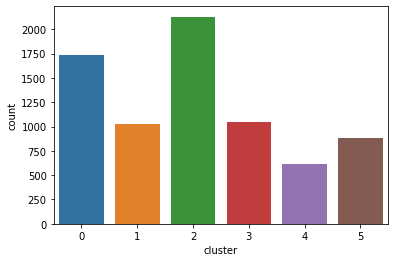

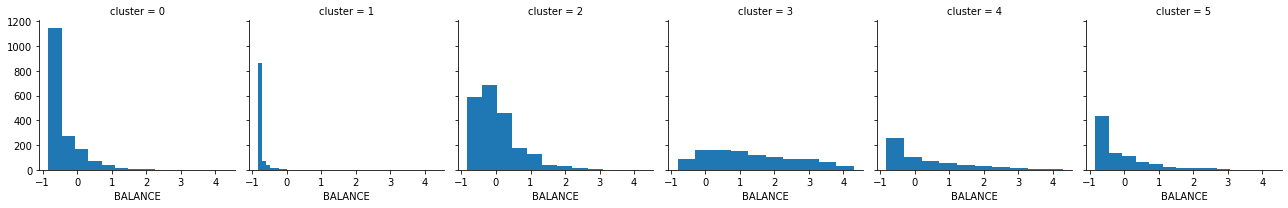

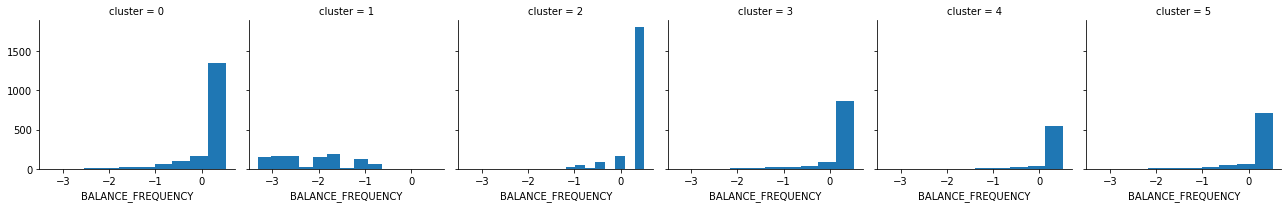

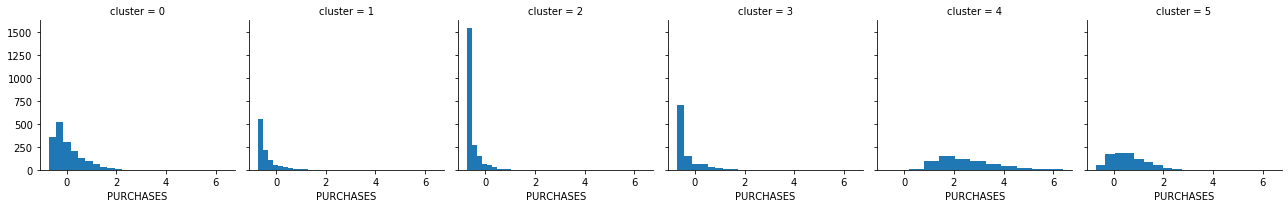

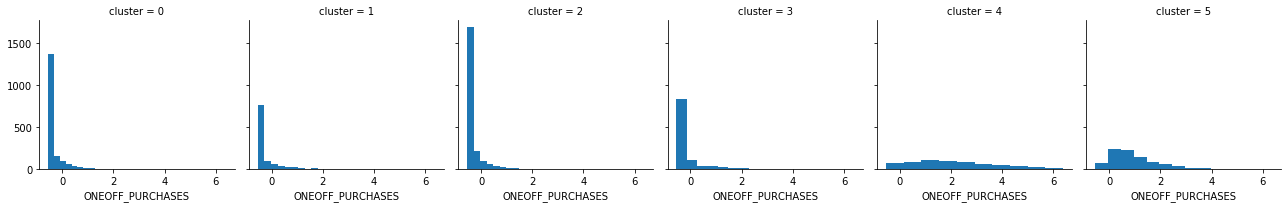

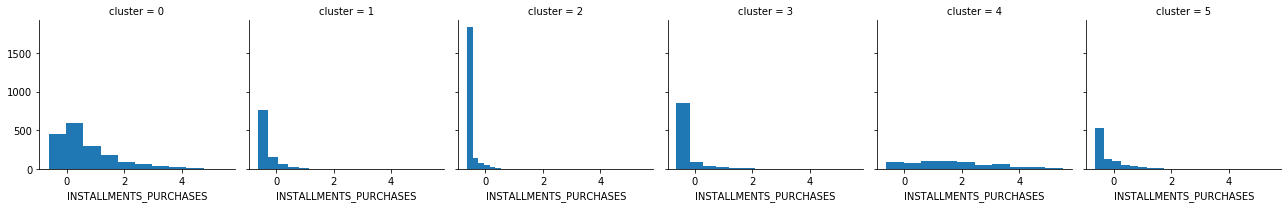

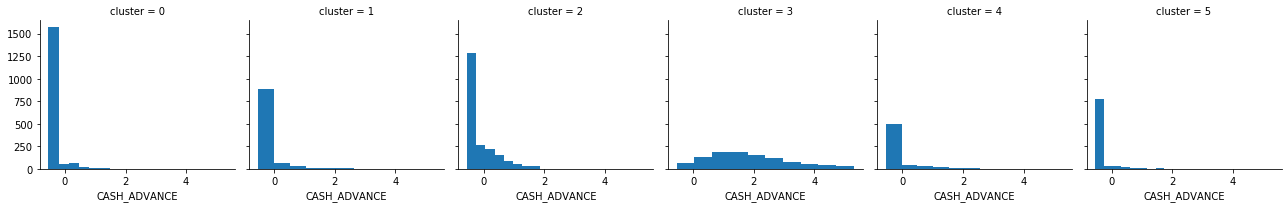

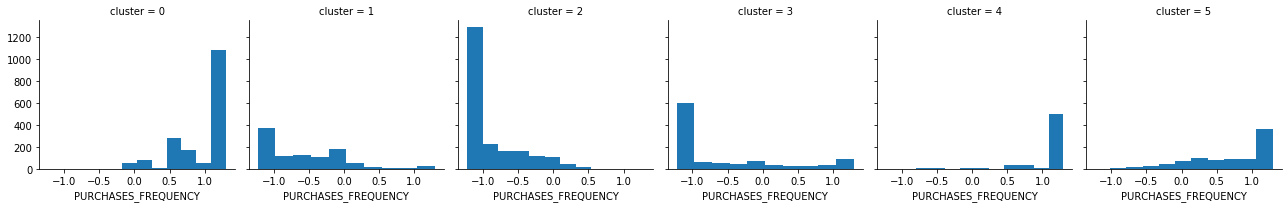

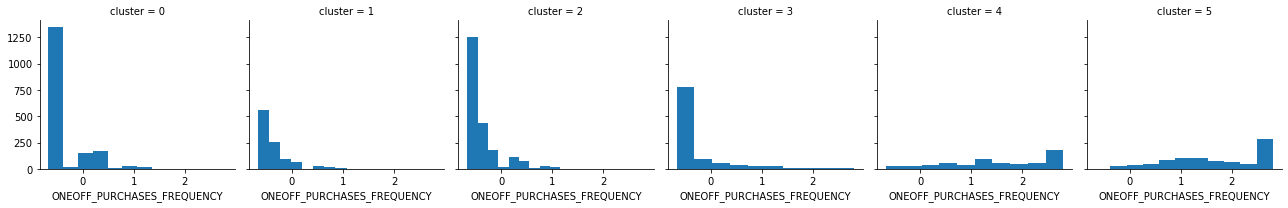

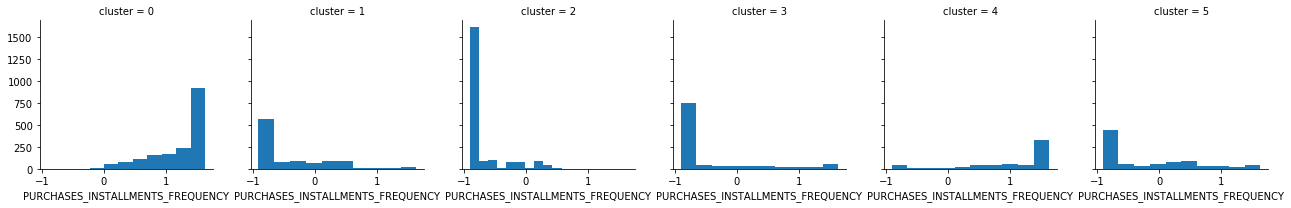

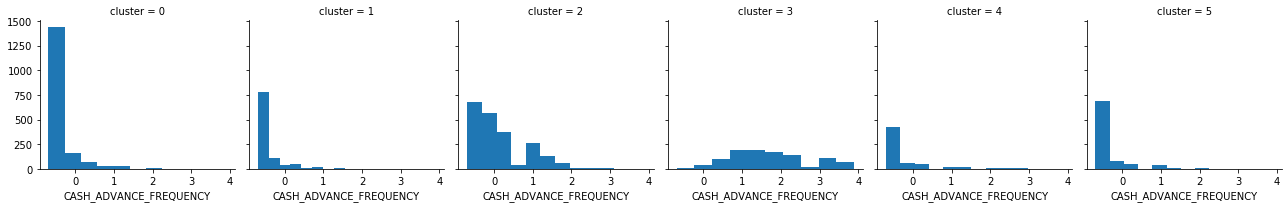

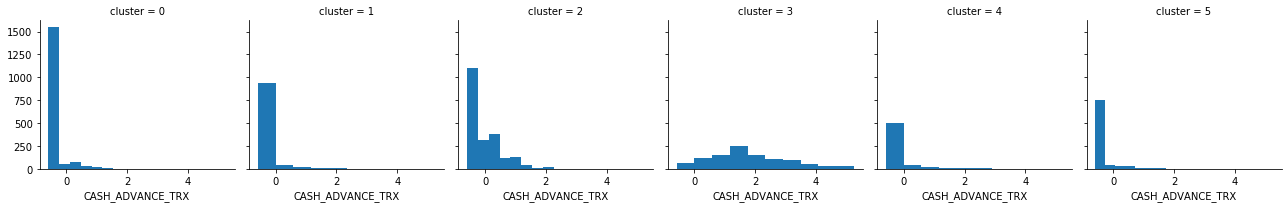

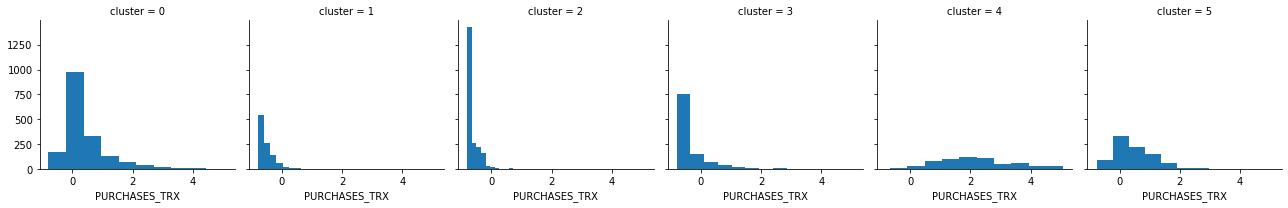

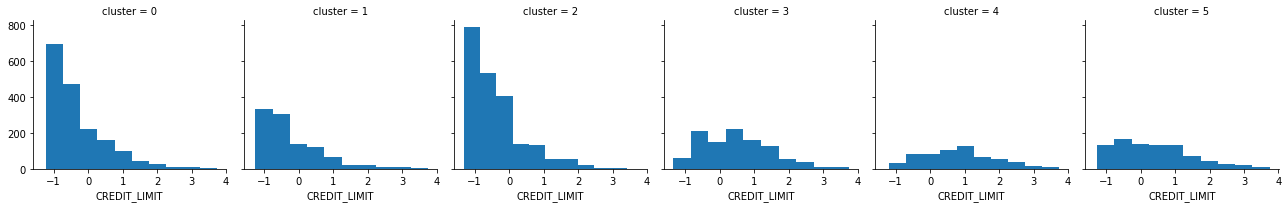

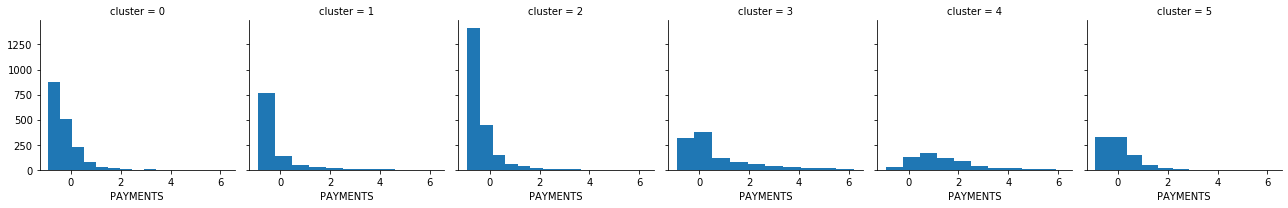

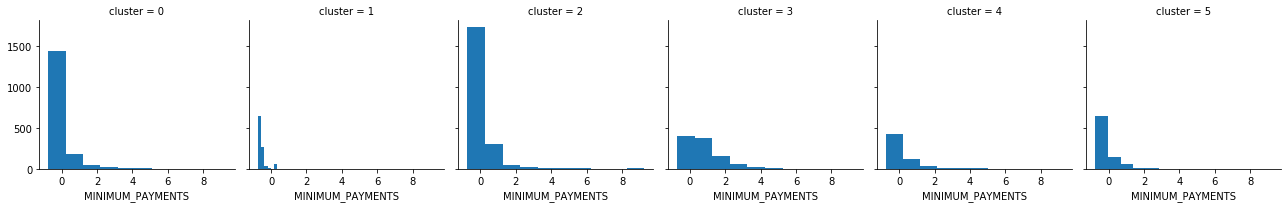

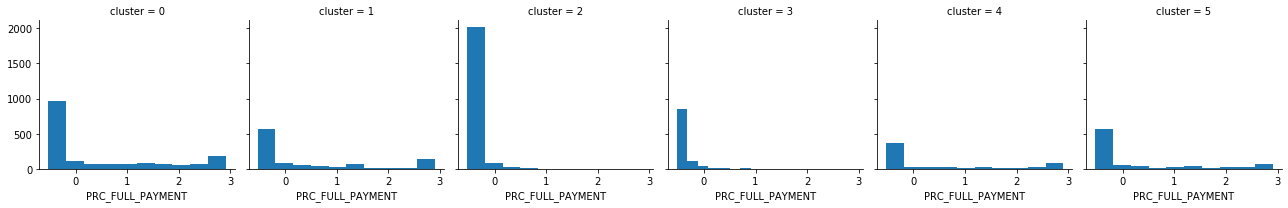

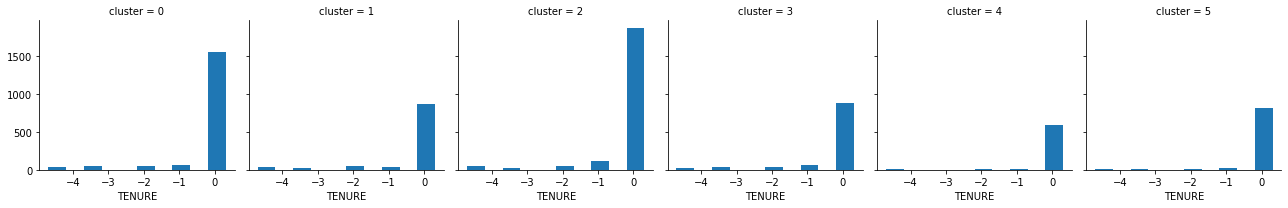

In [64]:
#Visualization
sns.countplot(x='cluster', data=clusters)

for c in data_1:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid= grid.map(plt.hist, c)
plt.show()


In [65]:
#Classification
clusters.shape
#print(clusters['cluster'].unique())
#print(clusters.groupby('cluster').size())

(7434, 18)

In [66]:
clusters['cluster'].unique()

array([2, 3, 5, 0, 1, 4])

In [67]:
clusters.groupby('cluster').size()

cluster
0    1740
1    1023
2    2130
3    1046
4     615
5     880
dtype: int64

In [68]:
#Split Dataset
X = clusters [['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]
y= clusters[['cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)



In [69]:
X

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.809652,-0.334911,-0.641448,-0.543505,-0.448067,-0.543984,-0.805098,-0.668791,-0.698321,-0.690806,-0.587319,-0.665235,-1.021765,-0.762853,-0.577804,-0.531523,0.312187
1,1.273272,0.091127,-0.734487,-0.543505,-0.636612,4.671914,-1.225631,-0.668791,-0.910579,0.883825,0.427706,-0.797517,1.022039,1.953121,0.623747,0.232637,0.312187
2,0.807271,0.517164,0.019551,0.430864,-0.636612,-0.543984,1.297564,2.808268,-0.910579,-0.690806,-0.587319,-0.003826,1.192356,-0.470272,0.050485,-0.531523,0.312187
3,0.261448,-1.186986,0.727420,1.345575,-0.636612,-0.377388,-1.015366,-0.379037,-0.910579,-0.165931,-0.333563,-0.731376,1.192356,-0.903344,0.355657,-0.531523,0.312187
4,-0.297867,0.517164,-0.718883,-0.523341,-0.636612,-0.543984,-1.015366,-0.379037,-0.910579,-0.690806,-0.587319,-0.731376,-0.953638,-0.431099,-0.442194,-0.531523,0.312187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429,-0.756687,-0.654440,-0.358761,-0.057990,-0.636612,-0.406721,0.035966,1.069739,-0.910579,0.096509,0.173950,-0.334531,-1.192081,-0.834962,-0.610734,-0.531523,-4.697636
7430,-0.800266,-0.068638,-0.575218,-0.543505,-0.313852,-0.543984,0.982164,-0.668791,0.999753,-0.690806,-0.587319,-0.334531,-1.021765,-0.859750,-0.616355,-0.531523,-4.697636
7431,-0.263862,-0.654440,-0.734487,-0.543505,-0.636612,0.390178,-1.225631,-0.668791,-0.910579,0.096509,0.173950,-0.797517,-0.953638,-0.798391,-0.322151,-0.531523,-4.697636
7432,-0.745849,0.517164,-0.304400,-0.543505,0.234966,-0.543984,0.666765,-0.668791,0.681364,-0.690806,-0.587319,-0.400671,-1.021765,-0.785516,-0.596957,-0.531523,-4.697636


In [70]:
y

,cluster
0,2
1,3
2,5
3,2
4,2
...,...
7429,2
7430,0
7431,2
7432,0


In [71]:
X_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1508,2.593550,0.517164,-0.734487,-0.543505,-0.636612,2.092529,-1.225631,-0.668791,-0.910579,1.671141,0.935218,-0.797517,1.873623,-0.209818,0.650485,-0.531523,-4.697636
522,0.858238,0.517164,-0.672071,-0.462851,-0.636612,-0.342656,-1.015366,-0.379037,-0.910579,-0.165931,-0.079807,-0.731376,-0.408624,-0.643366,4.324431,-0.531523,0.312187
2990,0.213379,0.517164,0.900801,-0.501061,2.610758,0.565252,1.297564,-0.379037,1.636530,0.358950,-0.079807,1.715839,-0.749257,0.170691,1.121661,-0.531523,0.312187
3642,0.253344,0.517164,-0.016465,0.061404,-0.130188,-0.543984,1.297564,-0.089280,1.424272,-0.690806,-0.587319,0.525302,1.022039,0.674913,-0.090022,-0.244964,0.312187
3871,0.418133,0.517164,3.209581,3.189034,1.502490,-0.543984,1.297564,2.518514,1.636530,-0.690806,-0.587319,3.567786,0.919849,3.491540,-0.087120,-0.531523,0.312187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5207,-0.574120,0.517164,2.833688,2.916208,1.168602,-0.543984,1.087298,2.228757,0.999753,-0.690806,-0.587319,2.377249,-0.510814,1.635184,-0.561857,2.907203,0.312187
4614,-0.414277,0.517164,-0.734487,-0.543505,-0.636612,-0.398005,-1.225631,-0.668791,-0.910579,0.883825,0.427706,-0.797517,-1.021765,-0.663049,-0.399723,-0.531523,0.312187
1451,0.002840,0.517164,4.356295,2.693198,4.603925,-0.543984,1.297564,2.228757,1.636530,-0.690806,-0.587319,3.567786,1.192356,1.870551,3.691232,-0.531523,0.312187
2916,3.105349,0.517164,3.332365,4.522656,-0.340157,1.365858,0.666765,1.939003,0.150717,2.983332,3.726537,0.723725,1.022039,1.167665,3.406521,-0.531523,0.312187


In [72]:
X_test

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2298,-0.791652,0.091127,-0.210112,-0.543505,0.426041,-0.543984,1.087298,-0.668791,1.424272,-0.690806,-0.587319,0.657584,-0.340497,-0.501382,-0.521953,1.031532,0.312187
5945,-0.775047,-0.420119,0.019190,0.430398,-0.636612,-0.543984,0.288286,1.417444,-0.910579,-0.690806,-0.587319,-0.202249,-0.953638,-0.310923,-0.623333,2.907203,-2.192724
3631,0.147834,0.517164,-0.386692,-0.155028,-0.541035,-0.543984,-0.384567,0.200474,-0.486060,-0.690806,-0.587319,-0.400671,-0.817384,-0.456853,0.097618,-0.531523,0.312187
3983,-0.295088,0.517164,0.228343,0.556219,-0.410081,-0.543984,1.087298,2.228757,0.150717,-0.690806,-0.587319,1.120571,0.851722,0.214100,-0.484325,-0.531523,0.312187
904,-0.211201,0.517164,-0.734487,-0.543505,-0.636612,-0.495567,-1.225631,-0.668791,-0.910579,0.358950,-0.079807,-0.797517,-1.021765,-0.785505,-0.438080,-0.531523,0.312187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4533,-0.776214,-2.465103,0.348056,0.855359,-0.636612,-0.543984,-0.805098,-0.089280,-0.910579,-0.690806,-0.587319,-0.665235,0.681405,1.397156,-0.648698,-0.531523,0.312187
6777,1.096458,-0.068638,-0.734487,-0.543505,-0.636612,1.649947,-1.225631,-0.668791,-0.910579,0.883825,-0.079807,-0.797517,-0.340497,-0.605052,0.137384,-0.531523,-4.697636
3523,-0.781008,0.517164,-0.471168,-0.543505,-0.102993,-0.543984,1.297564,-0.668791,1.424272,-0.690806,-0.587319,-0.003826,-0.953638,-0.688434,-0.531084,-0.531523,0.312187
3287,1.602883,0.517164,-0.734487,-0.543505,-0.636612,1.963473,-1.225631,-0.668791,-0.910579,2.458457,1.696487,-0.797517,0.681405,0.918616,0.255130,-0.531523,0.312187


In [73]:
y_train

,cluster
1508,3
522,2
2990,0
3642,0
3871,4
...,...
5207,4
4614,2
1451,4
2916,4


In [74]:
y_test

,cluster
2298,0
5945,5
3631,2
3983,5
904,2
...,...
4533,1
6777,2
3523,0
3287,3


In [75]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [76]:
y_pred

array([0, 5, 2, ..., 0, 3, 5])

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[479,   6,   9,   8,   9,  10],
       [  6, 314,   8,   4,   0,   6],
       [  7,   9, 591,  23,   0,  10],
       [  7,   4,  21, 268,   4,  11],
       [ 11,   1,   0,   1, 146,  11],
       [ 15,   3,  11,   0,  16, 202]], dtype=int64)

In [82]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
ac

0.8964589870013447

In [80]:
479+314+591+268+146+202

2000

In [81]:
2000/2231

0.8964589870013447